# Cancellation_booking

## Import Library

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datetime import datetime

## Import Database

In [90]:
path = "C:/Users/julia/Downloads/INNHotelsGroup.csv"
booking =  pd.read_csv(path)
booking

,lead_time,market_segment_type,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,arrival_date,required_car_parking_space,no_of_week_nights,booking_status
0,224,Offline,0,65.00,2,1,2017-10-02,0,2,Not_Canceled
1,5,Online,1,106.68,2,2,2018-11-06,0,3,Not_Canceled
2,1,Online,0,60.00,1,2,2018-02-28,0,1,Canceled
3,211,Online,0,100.00,2,0,2018-05-20,0,2,Canceled
4,48,Online,0,94.50,2,1,2018-04-11,0,1,Canceled
...,...,...,...,...,...,...,...,...,...,...
36270,85,Online,1,167.80,3,2,2018-08-03,0,6,Not_Canceled
36271,228,Online,2,90.95,2,1,2018-10-17,0,3,Canceled
36272,148,Online,2,98.39,2,2,2018-07-01,0,6,Not_Canceled
36273,63,Online,0,94.50,2,0,2018-04-21,0,3,Canceled


## Clean and Organize the data

In [91]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   lead_time                   36275 non-null  int64  
 1   market_segment_type         36275 non-null  object 
 2   no_of_special_requests      36275 non-null  int64  
 3   avg_price_per_room          36275 non-null  float64
 4   no_of_adults                36275 non-null  int64  
 5   no_of_weekend_nights        36275 non-null  int64  
 6   arrival_date                36275 non-null  object 
 7   required_car_parking_space  36275 non-null  int64  
 8   no_of_week_nights           36275 non-null  int64  
 9   booking_status              36275 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 2.8+ MB


In [92]:
# no missing data
booking.isna().sum()

lead_time                     0
market_segment_type           0
no_of_special_requests        0
avg_price_per_room            0
no_of_adults                  0
no_of_weekend_nights          0
arrival_date                  0
required_car_parking_space    0
no_of_week_nights             0
booking_status                0
dtype: int64

In [93]:
booking.describe()

,lead_time,no_of_special_requests,avg_price_per_room,no_of_adults,no_of_weekend_nights,required_car_parking_space,no_of_week_nights
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,85.232557,0.619655,103.423539,1.844962,0.810724,0.030986,2.204300
std,85.930817,0.786236,35.089424,0.518715,0.870644,0.173281,1.410905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,80.300000,2.000000,0.000000,0.000000,1.000000
50%,57.000000,0.000000,99.450000,2.000000,1.000000,0.000000,2.000000
75%,126.000000,1.000000,120.000000,2.000000,2.000000,0.000000,3.000000
max,443.000000,5.000000,540.000000,4.000000,7.000000,1.000000,17.000000


In [94]:
# # transform target from object to numerical type
# le = LabelEncoder()
# # apply can only use in multiply dimension array, not in one dimension array 
# # booking['booking_status'] = booking.loc[:,['booking_status']].apply(le.fit_transform)
# booking['booking_status'] = le.fit_transform(booking['booking_status'])
# booking

In [97]:
# change the arrival-date to date type
booking['arrival_date'] = pd.to_datetime(booking['arrival_date'])
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   lead_time                   36275 non-null  int64         
 1   market_segment_type         36275 non-null  object        
 2   no_of_special_requests      36275 non-null  int64         
 3   avg_price_per_room          36275 non-null  float64       
 4   no_of_adults                36275 non-null  int64         
 5   no_of_weekend_nights        36275 non-null  int64         
 6   arrival_date                36275 non-null  datetime64[ns]
 7   required_car_parking_space  36275 non-null  int64         
 8   no_of_week_nights           36275 non-null  int64         
 9   booking_status              36275 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(2)
memory usage: 2.8+ MB


In [107]:
# change market_segment_type and target from object type to numerical type
le = LabelEncoder()
object_type = booking.select_dtypes('object').columns
booking[object_type] = booking.select_dtypes('object').apply(le.fit_transform)

## Visualize the Data

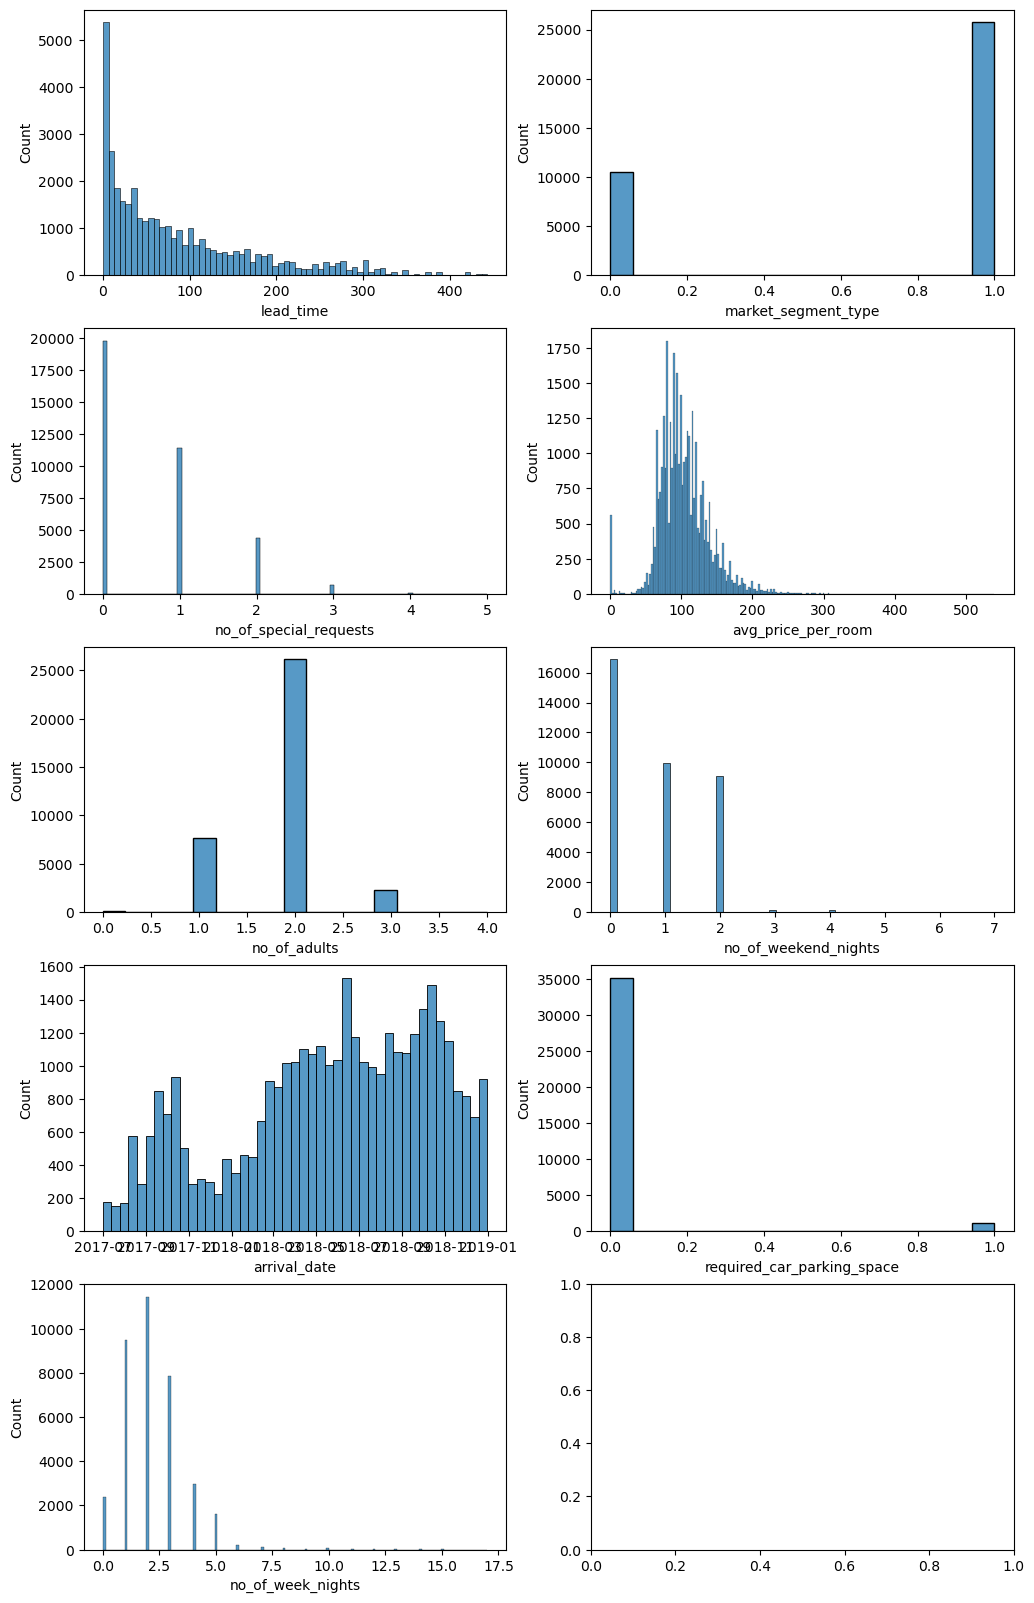

In [130]:
# visualize each feature in dataset
fig, axes = plt.subplots(nrows = 5, ncols = 2, figsize = (12, 20))
axes = np.ravel(axes)
for i,j in enumerate(booking.columns[0:-1]):
  sns.histplot(data = booking, x = j, ax = axes[i])
plt.show()


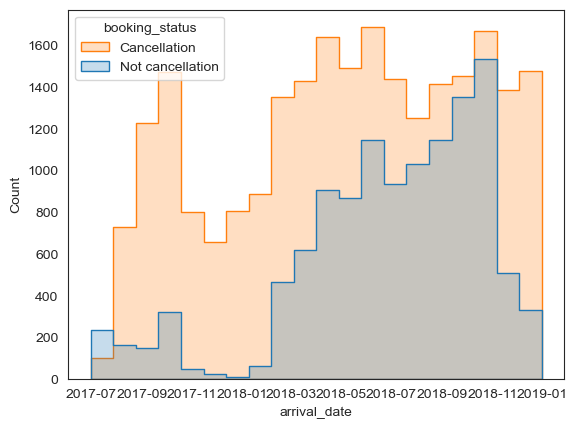

In [150]:
# visualize the whole year cancellation and not-cancellation
sns.set_style('white')
sns.histplot(data = booking, x = 'arrival_date', hue = 'booking_status', bins = 20, element = 'step')
plt.legend(title = 'booking_status', loc = 'upper left', labels = ['Cancellation', 'Not cancellation'])
plt.show()

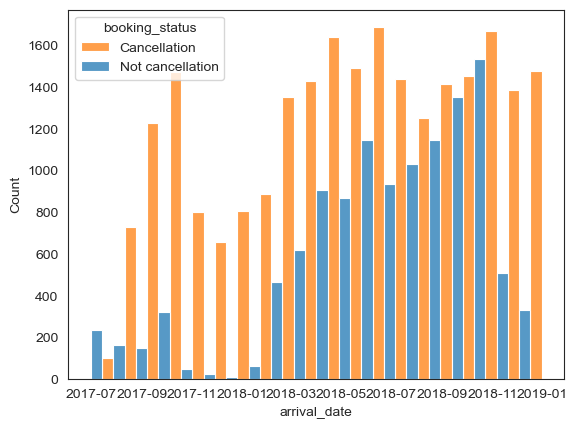

In [152]:
# visualize the whole year cancellation and not-cancellation
sns.set_style('white')
sns.histplot(data = booking, x = 'arrival_date', hue = 'booking_status', bins = 20, multiple = 'dodge')
plt.legend(title = 'booking_status', loc = 'upper left', labels = ['Cancellation', 'Not cancellation'])
plt.show()